In [1]:
import ptracer as pt
import numpy as np
from importlib import reload
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact
%load_ext snakeviz

In [2]:
reload(pt)

<module 'ptracer' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/ptracer.py'>

# Normalisation

In [3]:
a = np.array([
    [0,1,0],
    [0,1,1],
    [1,1,1],
    [-3,0,0],
    [-3,0,-1]
])

In [4]:
[pt.normalize(v) for v in a]

[array([0., 1., 0.]),
 array([0.        , 0.70710678, 0.70710678]),
 array([0.57735027, 0.57735027, 0.57735027]),
 array([-1.,  0.,  0.]),
 array([-0.9486833 ,  0.        , -0.31622777])]

In [5]:
pt.normalize_array(a)

array([[ 0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.70710678,  0.70710678],
       [ 0.57735027,  0.57735027,  0.57735027],
       [-1.        ,  0.        ,  0.        ],
       [-0.9486833 ,  0.        , -0.31622777]])

# Basic RF

In [6]:
rf = pt.BasicRF(0, [z for z in range(5)], 3, [1,1,1], 0.5)
print(rf.origins)
print(rf.dirs)
print(rf.weights)
print(rf.wavelength)

[[0. 0. 3.]
 [0. 1. 3.]
 [0. 2. 3.]
 [0. 3. 3.]
 [0. 4. 3.]]
[[0.57735027 0.57735027 0.57735027]
 [0.57735027 0.57735027 0.57735027]
 [0.57735027 0.57735027 0.57735027]
 [0.57735027 0.57735027 0.57735027]
 [0.57735027 0.57735027 0.57735027]]
[0.5 0.5 0.5 0.5 0.5]
600.0


# Scene

In [7]:
scene = pt.Scene(rf, [])
scene.r_origins

array([[0., 0., 3.],
       [0., 1., 3.],
       [0., 2., 3.],
       [0., 3., 3.],
       [0., 4., 3.]])

In [8]:
scene.r_dirs

array([[0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027]])

In [9]:
scene.propagate(1)
scene.r_origins

array([[0.57735027, 0.57735027, 3.57735027],
       [0.57735027, 1.57735027, 3.57735027],
       [0.57735027, 2.57735027, 3.57735027],
       [0.57735027, 3.57735027, 3.57735027],
       [0.57735027, 4.57735027, 3.57735027]])

# Surface

In [145]:
reload(pt)

<module 'ptracer' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/ptracer.py'>

In [146]:
rf = pt.BasicRF(-1,1,np.linspace(0,2,20),[1,-1,0])
surface = pt.Surface([0,0,0], [0,1,1], n_in=1.5, reflective=False)
scene = pt.Scene(rf, [surface])
scene.run()
scene.propagate(1)

<IPython.core.display.Javascript object>


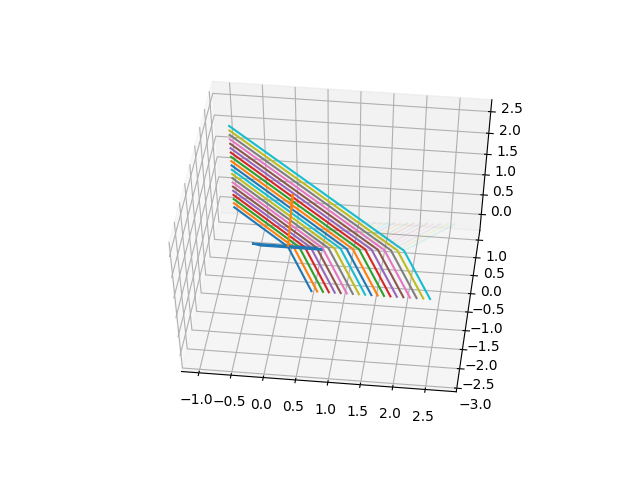

[[0. 0. 0.]]
[[1.48029737e-17 1.34567263e-02 1.34567263e-02]]


In [147]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scene.plot(ax, m_quiver=True)

In [13]:
scene.r_weights

array([0.91081329, 0.91081329, 0.91081329, 0.91081329, 0.91081329,
       0.91081329, 0.91081329, 0.91081329, 0.91081329, 0.91081329,
       0.91081329, 0.91081329, 0.91081329, 0.91081329, 0.91081329,
       0.91081329, 0.91081329, 0.91081329, 0.91081329, 0.91081329,
       0.08918671, 0.08918671, 0.08918671, 0.08918671, 0.08918671,
       0.08918671, 0.08918671, 0.08918671, 0.08918671, 0.08918671,
       0.08918671, 0.08918671, 0.08918671, 0.08918671, 0.08918671,
       0.08918671, 0.08918671, 0.08918671, 0.08918671, 0.08918671])

# Spheres

In [14]:
reload(pt)

<module 'ptracer' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/ptracer.py'>

In [15]:
rf = pt.BasicRF(-1,np.linspace(-1,1,20),np.linspace(-1,1,20),[1,0,0])
sphere = pt.Sphere([0,0,0], 0.5, n_in=1.3)
scene = pt.Scene(rf, [sphere])
scene.run()
scene.propagate(1)

<IPython.core.display.Javascript object>


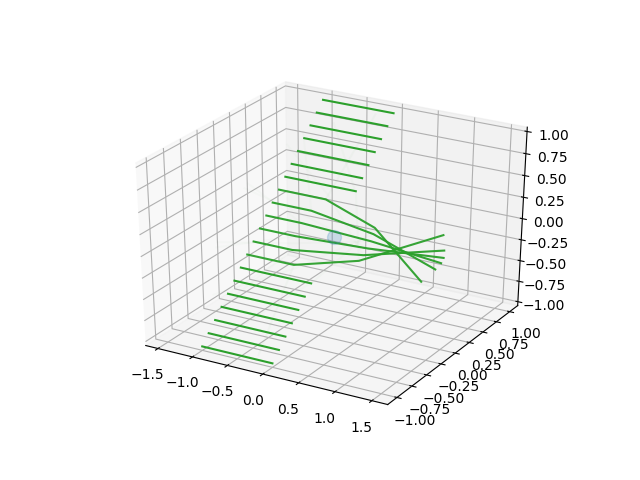

[[0. 0. 0.]]
[[ 1.06592751e-03 -2.52355114e-19 -2.52355114e-19]]


In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scene.plot(ax, m_quiver=True, ray_kwargs={"c":"tab:green"})

# Making a hexagonal lattice

2 5
1 5
0 5
1 5
2 5


<IPython.core.display.Javascript object>


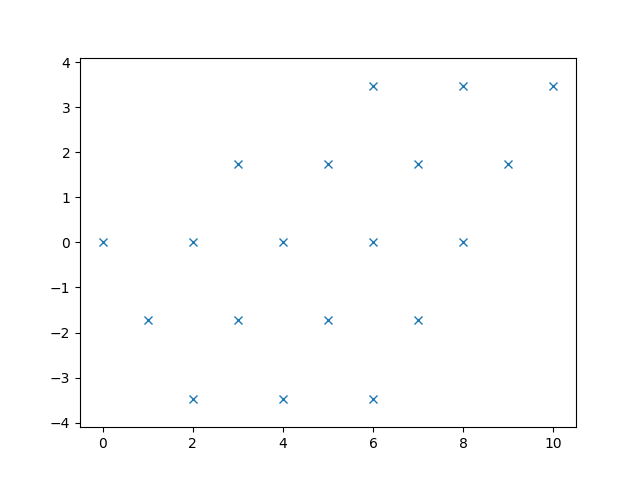

(-0.5, 10.5, -3.8105117766515297, 3.8105117766515297)

In [17]:
x = []
y = []
for j in range(-2, 3):
    n = 5-abs(j)
    print(abs(j), n+abs(j))
    for k in range(abs(j), n+abs(j)):
        x.append(j + 2*k)
        y.append(np.sqrt(3)*j)
fig, ax = plt.subplots()
ax.plot(x, y, "x")
ax.axis("equal")

61
9
1.2371791482634837


<IPython.core.display.Javascript object>


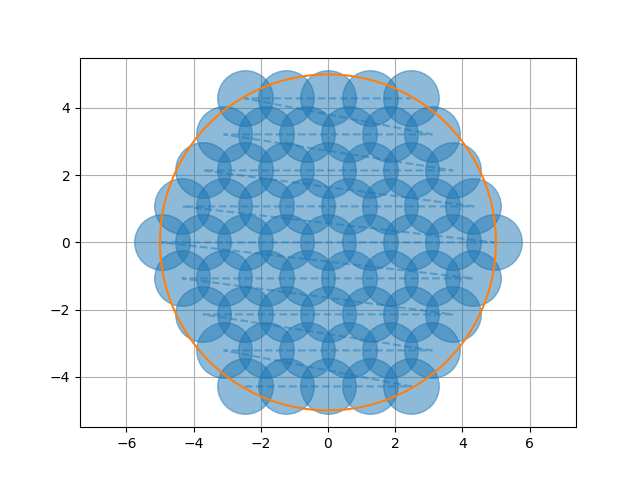

In [9]:
# Define n as the number of layers
n = 5
r = 5

print(3*n*(n-1) + 1)
a = 2*n-1
print(a)

b = 2*r/np.sqrt(3) / (n-1/3)
print(b)
# b=1

x = []
y = []
for j in range(-n+1, n):
    for i in range(-(a//2), a//2-abs(j)+1):
        x.append(b*(i + abs(j)/2))
        y.append(b*(np.sqrt(3)*j/2))
fig, ax = plt.subplots()
ax.plot(x, y, "o--", ms=40, alpha=0.5)

t = np.linspace(0, np.pi*2, 100)
ax.plot(r*np.cos(t), r*np.sin(t))

ax.axis("equal")
ax.grid()

In [425]:
N = 301
n = int(np.round((3+np.sqrt(12*N-3))/6))
print(3*n*(n-1) + 1)

331


# Let's try circles!

4 0.2857142857142857 0.3714198211140642


<IPython.core.display.Javascript object>


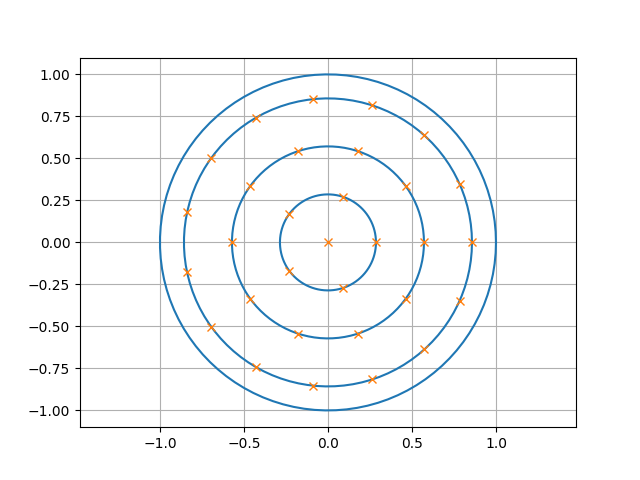

31


In [19]:
# Parameters
N = 30
R = 1

# Calculated properties
n = round(.5*(1 + np.sqrt(1+4*(N-1)/np.pi)))
d = R/(n-.5)
d_ring = np.pi * d * n * (n-1)/(N-1)
print(n, d, d_ring)

fig, ax = plt.subplots()
a = 1

t = np.linspace(0, np.pi*2, 100)
ax.plot(R*np.cos(t), R*np.sin(t), c="tab:blue")
ax.plot(0, 0, "x", c="tab:orange")
for i in range(1, n):
    n_ring = round(2*np.pi*i*d/d_ring)
    a += n_ring
    t_ring = np.arange(0, 2*np.pi, 2*np.pi/n_ring)
    ax.plot(i*d*np.cos(t), i*d*np.sin(t), c="tab:blue")
    ax.plot(i*d*np.cos(t_ring), i*d*np.sin(t_ring), "x", c="tab:orange")
ax.axis("equal")
ax.grid()
print(a)

<IPython.core.display.Javascript object>


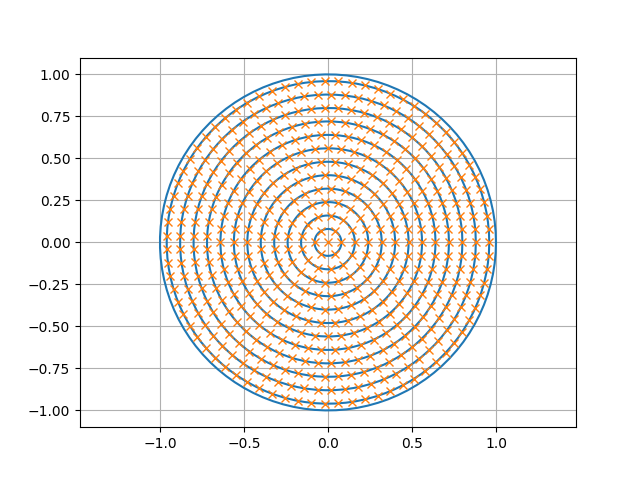

491


In [20]:
# Parameters
N = 500
R = 1

# Calculated properties
n = round(.5*(1 + np.sqrt(1+4*(N-1)/np.pi)))
d = R/(n-.5)

fig, ax = plt.subplots()
a = 1

t = np.linspace(0, np.pi*2, 100)
ax.plot(R*np.cos(t), R*np.sin(t), c="tab:blue")
ax.plot(0, 0, "x", c="tab:orange")
for i in range(1, n):
    n_ring = round(2*np.pi*i)
    a += n_ring
    t_ring = np.arange(0, 2*np.pi, 2*np.pi/n_ring)
    ax.plot(i*d*np.cos(t), i*d*np.sin(t), c="tab:blue")
    ax.plot(i*d*np.cos(t_ring), i*d*np.sin(t_ring), "x", c="tab:orange")
ax.axis("equal")
ax.grid()
print(a)

4 0.2857142857142857 0.32639923673660187


<IPython.core.display.Javascript object>


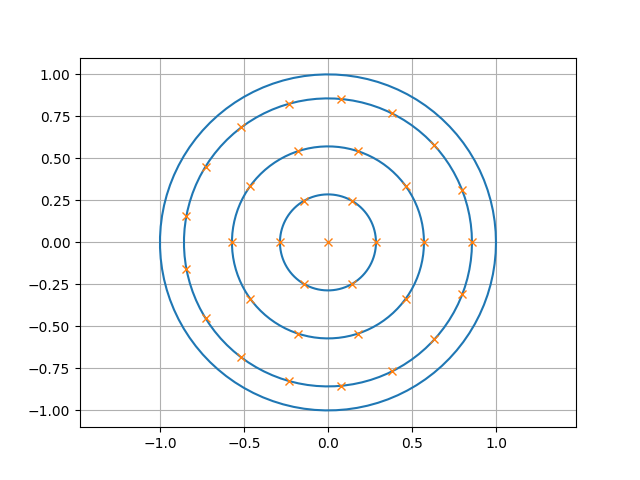

-0.16319961836830088
0.3263992367366022
-0.1631996183683011
34


In [21]:
# Parameters
N = 34
R = 1

# Calculated properties
n = round(.5*(1 + np.sqrt(1+4*(N-1)/np.pi)))
d = R/(n-.5)
d_ring = np.pi * d * n * (n-1)/(N-1)
print(n, d, d_ring)

fig, ax = plt.subplots()
a = 1

t = np.linspace(0, np.pi*2, 100)
ax.plot(R*np.cos(t), R*np.sin(t), c="tab:blue")
ax.plot(0, 0, "x", c="tab:orange")
offset = 0
for i in range(1, n):
    n_ring = round((2*np.pi*i*d + offset)/d_ring)
    offset = (2*np.pi*i*d + offset) - n_ring*d_ring
    print(2*np.pi*i*d - n_ring*d_ring)
    a += n_ring
    t_ring = np.arange(0, 2*np.pi, 2*np.pi/n_ring)
    ax.plot(i*d*np.cos(t), i*d*np.sin(t), c="tab:blue")
    ax.plot(i*d*np.cos(t_ring), i*d*np.sin(t_ring), "x", c="tab:orange")
ax.axis("equal")
ax.grid()
print(a)

# Adaptive Gaussian RF

In [451]:
reload(pt)

<module 'ptracer' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/ptracer.py'>

<IPython.core.display.Javascript object>


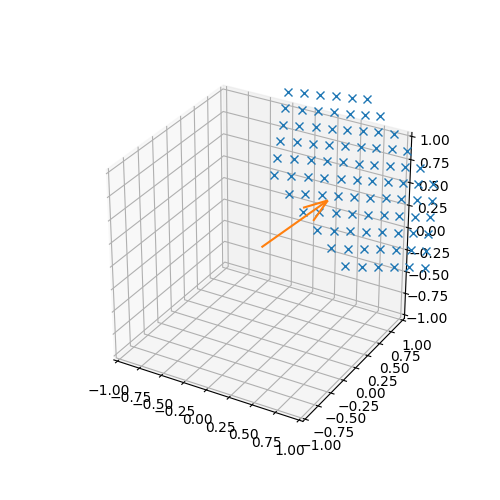

(-1.0, 1.0)

In [452]:
rf = pt.HexagonalGaussianRF([0,0,0], [1,0,1], .5, 1, 100, 600, [1,0,1], 1)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot(rf.origins[:,0], rf.origins[:,1], rf.origins[:,2], "x")
ax.quiver(0,0,0, *rf.dirs[0], color="tab:orange")
# ax.axis("equal")
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

In [453]:
np.sum(rf.weights) * 6.62607004e-25 * 299792458 / 600

0.9997805436681847

# Ray bundle directions

In [459]:
reload(pt)

<module 'ptracer' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/ptracer.py'>

In [460]:
waist_radius = 0.1
wavelength = 6e7
rf = pt.HexagonalGaussianRF([0,0,0], [0,.5,1], waist_radius, 1, 100, wavelength, [0,0,0], 1, curve=True)
for i in range(1,30):
    rf += pt.HexagonalGaussianRF([0,0,0], [0,.5,1], waist_radius, 1, 100, wavelength, [0,.05*i,i*.1], 1, curve=True)
# rf += pt.AdaptiveGaussianRF([0,0,0], [0,1,-1], waist_radius, 1, 100, wavelength, [0,0,0], 1)
# for i in range(1,5):
#     rf += pt.AdaptiveGaussianRF([0,0,0], [0,1,-1], waist_radius, 1, 100, wavelength, [0,0,-i], 1)
scene = pt.Scene(rf, [])
scene.propagate(.09)

<IPython.core.display.Javascript object>


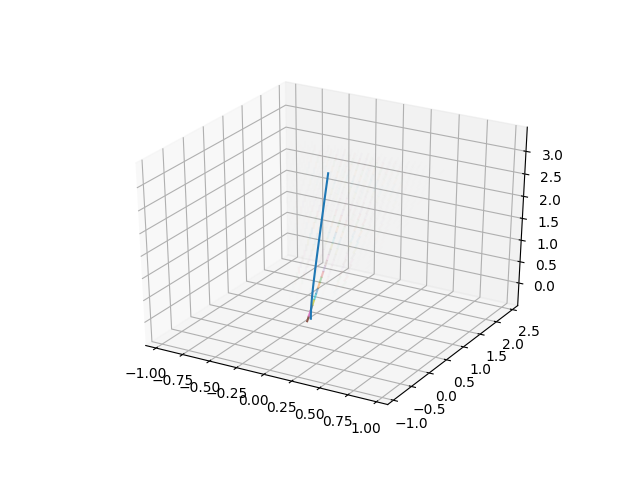

In [461]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scene.plot(ax, m_quiver=False)
z = np.linspace(0,3,100)
w = waist_radius * np.sqrt(1 + ((z*wavelength*1e-9)/(np.pi*waist_radius**2))**2)
ax.plot(np.zeros_like(z), w, z)

# Ray bundle curvature

In [462]:
reload(pt)

<module 'ptracer' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/ptracer.py'>

In [471]:
waist_radius = 3.4e-6
wavelength = 532
z_max = 100e-6
rf = pt.AdaptiveGaussianRF([0,0,0], [0,0,1], 3.4e-6, 300e-3, 200, 532, [0,10e-6,z_max], 10e-6, curve=True)
scene = pt.Scene(rf, [])
scene.propagate(10e-6)

<IPython.core.display.Javascript object>


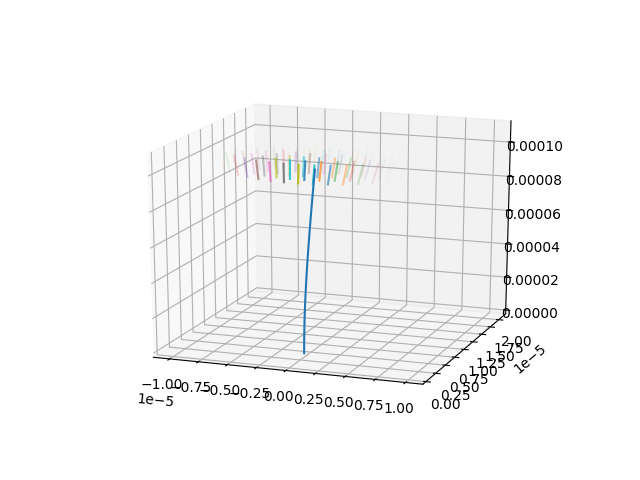

In [472]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scene.plot(ax, m_quiver=False)
z = np.linspace(0,z_max,100)
w = waist_radius * np.sqrt(1 + ((z*wavelength*1e-9)/(np.pi*waist_radius**2))**2)
ax.plot(np.zeros_like(z), w, z)

# Ray bundle in action

In [441]:
rf = pt.AdaptiveGaussianRF([0,0,0], [0,0,1], .3, 1, 100, 600, [0,0,0], 0.5)
sphere = pt.Sphere([0,0,3], 0.5, n_in=1.3)
scene = pt.Scene(rf, [sphere])
scene.run()
scene.propagate(1)

<IPython.core.display.Javascript object>


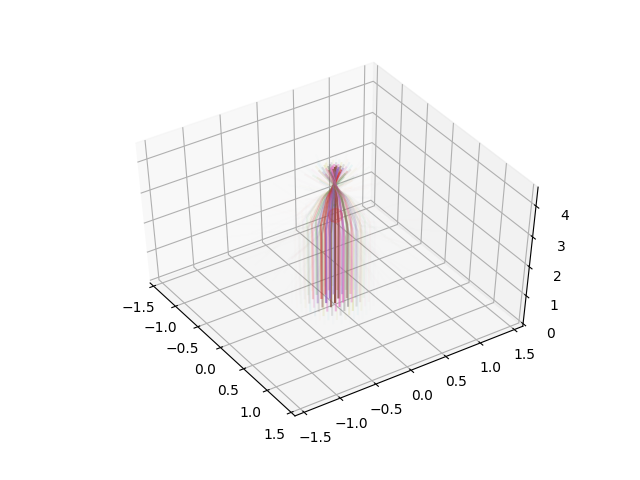

In [442]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scene.plot(ax, m_quiver=True)

# Plane rendering

In [282]:
reload(pt)

<module 'ptracer' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/ptracer.py'>

In [283]:
rf = pt.BasicRF(-1,1,np.linspace(0,2,20),[1,-1,-2])
surface = pt.Surface([0,0,0], [-1,-1,1], n_in=1.5, reflective=False)
scene = pt.Scene(rf, [surface])
# scene.run()
scene.propagate(1)

<IPython.core.display.Javascript object>


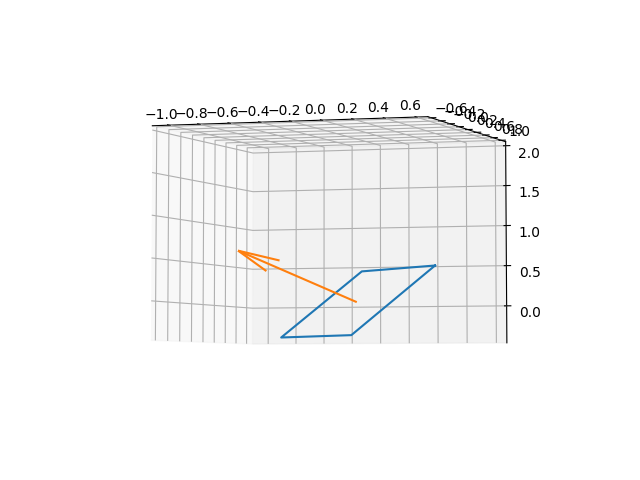

In [284]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scene.plot(ax)

# What does a Gaussian beam's electric field look like?

In [557]:
waist = 3.39728e-6
wavelength = 532e-9
z_r = np.pi*waist**2/(wavelength)
k = 2*np.pi/(wavelength)
def w(z):
    return waist * np.sqrt(1+(z/z_r)**2)
def iR(z):
    return z / (z**2 + z_r**2)
def guoy(z):
    return np.arctan(z/z_r)
def e(r, z):
    # The sign for k*r**2/2*iR(z) is inconsistent with literature, but produces physicality?
    return waist/w(z) * np.exp(-r**2/w(z)**2) * np.exp(-1j*k*z - 1j*k*r**2/2*iR(z) + 1j*guoy(z))

<IPython.core.display.Javascript object>


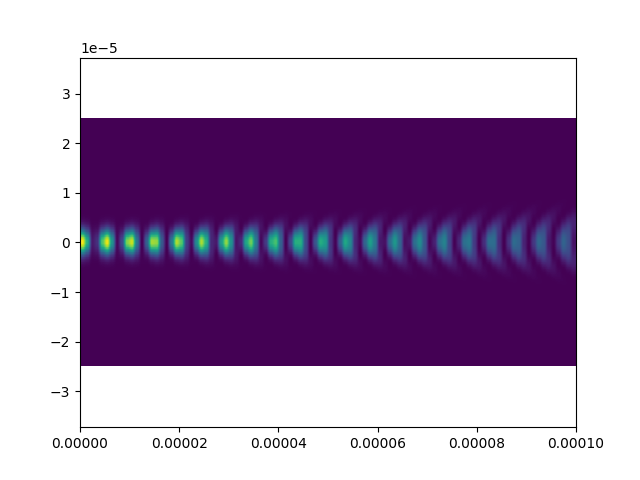

In [563]:
xr = (0,100e-6)
x = np.linspace(*xr, 100)
yr = (-25e-6, 25e-6)
y = np.linspace(*yr, 100)
xx, yy = np.meshgrid(x, y, sparse=True)
z = e(yy, xx)
fig, ax = plt.subplots()
# @interact(vmin=(-.01,.01,.001), vmax=(-.01,.01,0.001))
def show(vmin=-1., vmax=1.):
    ax.clear()
    ax.imshow(np.real(z)**2, extent=(xr[0], xr[1], yr[0], yr[1]), vmin=vmin, vmax=vmax)
    ax.axis("equal")
# show(-0.000000001,0.00000001)100
show(0,1)

# Triangles

In [28]:
reload(pt)

<module 'ptracer' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/ptracer.py'>

<IPython.core.display.Javascript object>


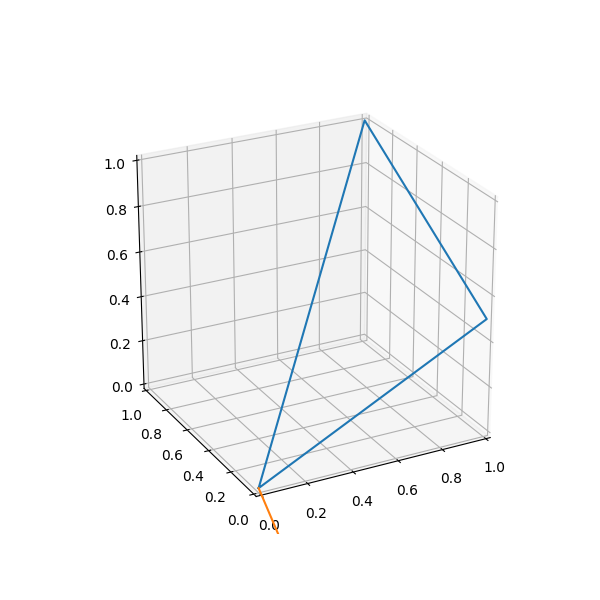

(0.0, 1.0)

In [32]:
t = pt.Triangle([0,0,0], [1,1,1], [1,0,.5])
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
t.plot(ax)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

In [154]:
reload(pt)

<module 'ptracer' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/ptracer.py'>

<IPython.core.display.Javascript object>


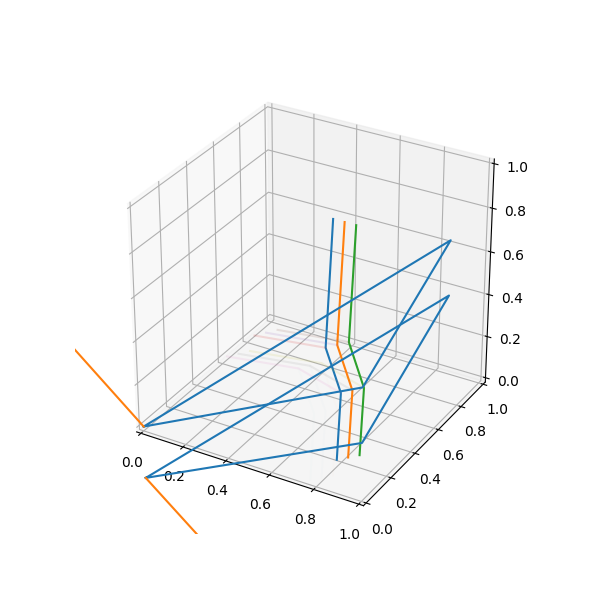

(0.0, 1.0)

In [192]:
t = pt.Triangle([0,0,0], [1,0,.5], [1,.7,.8], n_in=2)
t2 = pt.Triangle([0,0,0-.25], [1,.7,.8-.25], [1,0,.5-.25], n_in=2)
rf = pt.BasicRF([.7,.75, .8],.3,1, [0,-.1,-1])
scene = pt.Scene(rf, [t, t2])
scene.run()
scene.propagate(0.3)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
scene.plot(ax)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

# ObjectContainer

In [225]:
reload(pt)

<module 'ptracer' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/ptracer.py'>

In [227]:
t = pt.Triangle(None, [0,0,0], [1,0,.5], [1,.7,.8], n_in=2)
t2 = pt.Triangle(None, [0,0,0-.25], [1,.7,.8-.25], [1,0,.5-.25], n_in=2)
oc = pt.ObjectContainer([t2, t2, t2])
scene = pt.Scene(rf, [t, oc, t])

In [228]:
scene.objects

# Mesh

<IPython.core.display.Javascript object>


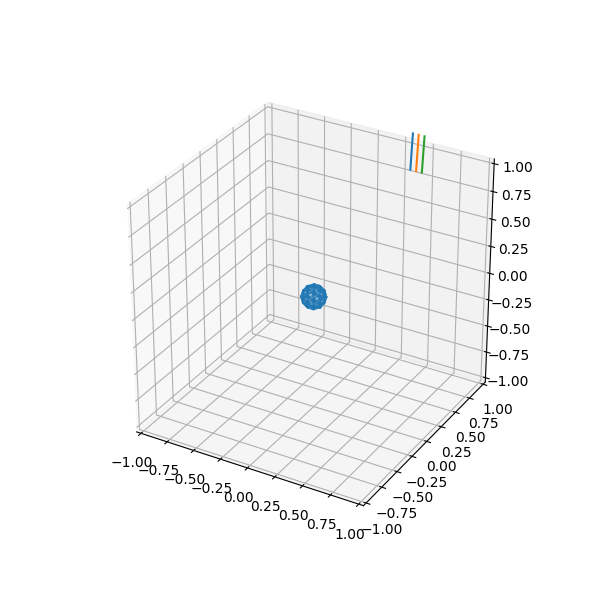

(-1.0, 1.0)

In [295]:
mesh = pt.Mesh([0,0,0], "sphere.obj", .1, n_in=1.3)
rf = pt.BasicRF([.7,.75, .8],.3,1.5, [0,-.1,-1])
scene = pt.Scene(rf, [mesh])
scene.run()
scene.propagate(0.3)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
scene.plot(ax)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

# Many triangles and rays

In [379]:
reload(pt)
reload(pt.jm)

<module 'jit_methods' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/jit_methods.py'>

In [375]:
# %%snakeviz
mesh = pt.Sphere([1e-6,2e-6,50e-6],5e-6,n_in=1.52, reflective=False)
rf = pt.AdaptiveGaussianRF([0,0,0],[0,0,1],3.4e-6,300e-3,300,532,[1e-6,2e-6,-5.1e-6+50e-6],5e-6)
scene = pt.Scene(rf, [mesh])
scene.run()
scene.propagate(3e-6)
print(scene.momentum)

[-1.25854323e+14 -2.51709019e+14  3.77774849e+14]


In [383]:
%%snakeviz
mesh = pt.MeshTO([1e-6,2e-6,50e-6], "cruel_sphere.obj", 5e-6, n_in=1.52, reflective=False)
rf = pt.AdaptiveGaussianRF([0,0,0],[0,0,1],3.4e-6,300e-3,300,532,[0e-6,2e-6,-5.1e-6+50e-6],5e-6)
scene = pt.Scene(rf, [mesh])
scene.run(limit=5)
scene.propagate(3e-6)
print(scene.momentum*6.62607004e-34*1e9)

[-7.93563618e-11 -1.49312349e-10  2.14504956e-10]
 
*** Profile stats marshalled to file '/tmp/tmp6htk438g'. 
Embedding SnakeViz in this document...


<IPython.core.display.Javascript object>


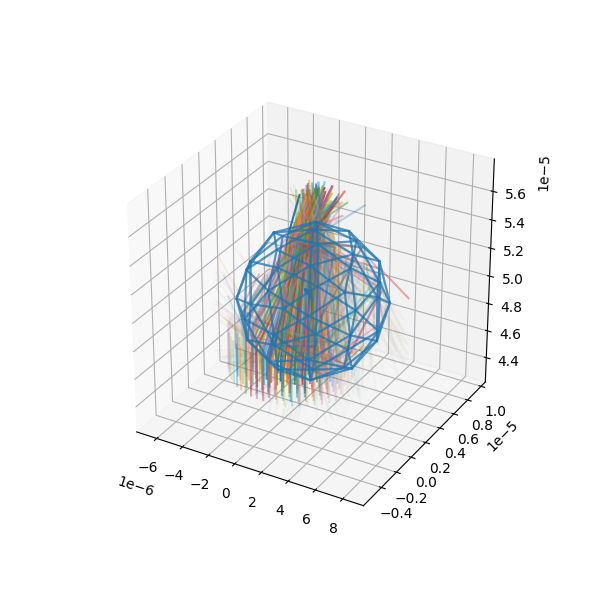

In [372]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
scene.plot(ax, m_quiver=True)
# ax.set_xlim(-1,1)
# ax.set_ylim(-1,1)
# ax.set_zlim(-1,1)

# Mesh revisited

In [242]:
reload(pt)
reload(pt.jm)

<module 'jit_methods' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/jit_methods.py'>

---------------


<IPython.core.display.Javascript object>


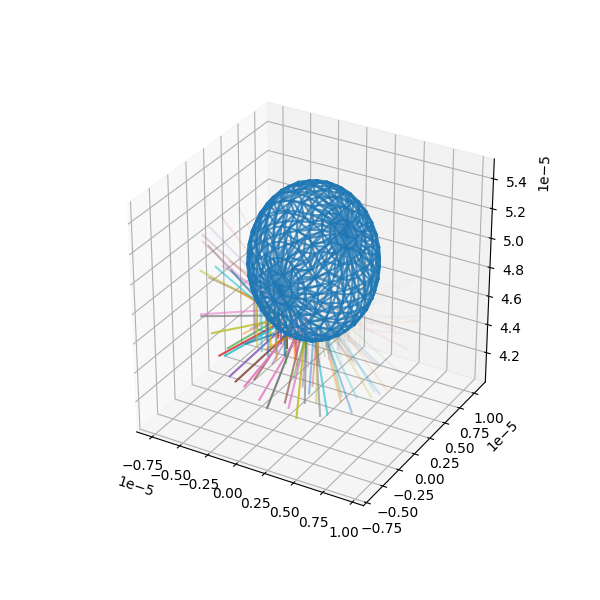

In [243]:
# m = pt.MeshTO([0,0,0], "cruel_sphere.obj", 1, n_in=1.52, reflective=True)
m = pt.MeshTO([1e-6,2e-6,50e-6], "cruel_sphere.obj", 5e-6, n_in=1.52, reflective=True)
# rf = pt.BasicRF([-1.5, -1.6, -1.7], [-.2,-.4,-.6], -.32, [1,0,0])
rf = pt.AdaptiveGaussianRF([0,0,0],[0,0,1],3.4e-6,300e-3,100,532,[1e-6,2e-6,-5.1e-6+50e-6],5e-6)
scene = pt.Scene(rf, [m])
scene.step()
scene.propagate(1e-10)
print("-"*15)
scene.step()
scene.propagate(5e-6)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
scene.plot(ax)